## Loading Packages

In [1]:
#loading packages
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                                     # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

## Importing the employess dataset

In [3]:
employee = pd.read_csv("C:/Users/suddutta/Downloads/Term 1 data files/Term-1-master/Data/Casestudy/Employee data.csv")
employee.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
0,Female,1,Sales,8,1,3,6,5993,5893
1,Female,5,Research,8,3,3,8,5130,4000
2,Female,10,Content Writing,12,2,4,1,2090,3050
3,Female,15,Content Writing,10,3,3,9,2909,5909
4,Female,20,Sales,10,3,2,10,3468,2468


## Overview of the dataset

In [4]:
employee.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Gender                      1470 non-null object
Employee Number             1470 non-null int64
Skills                      1470 non-null object
Total Working Years         1470 non-null int64
Work Life Balance           1470 non-null int64
Performance Rating          1470 non-null int64
Years At Company            1470 non-null int64
MonthlyIncome(June-2018)    1470 non-null int64
MonthlyIncome(June-2017)    1470 non-null int64
dtypes: int64(7), object(2)
memory usage: 103.4+ KB


- There are a total of 1470 rows and 9 columns in the dataset
- None of the columns have any missing values
- Gender and Skills columns are categorical in nature while all the other columns are numeric

## Summary of the data

In [5]:
employee.describe(include = 'all')

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
count,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,2,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,Sales,NaN,NaN,NaN,NaN,NaN,NaN
freq,1005,NaN,554,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1024.865306,NaN,11.279592,2.761224,3.116327,7.008163,6502.931293,6503.476871
std,NaN,602.024335,NaN,7.780782,0.706476,0.437447,6.126525,4707.956783,4706.952696
min,NaN,1.000000,NaN,0.000000,1.000000,1.000000,0.000000,1009.000000,1009.000000
25%,NaN,491.250000,NaN,6.000000,2.000000,3.000000,3.000000,2911.000000,2914.750000
50%,NaN,1020.500000,NaN,10.000000,3.000000,3.000000,5.000000,4919.000000,4919.000000
75%,NaN,1555.750000,NaN,15.000000,3.000000,3.000000,9.000000,8379.000000,8379.000000


- 'Employee Number' is unique and does not reveal any valuable information. Hence, we will drop this column from our analysis
- 'Gender' has 2 values with Male occuring most number of times
- There are 7 different 'Skills' possessed by the employees of this company and Sales is the most frequently occuring skill
- 75% employees working in the company have <= 15 years of experience while few have 40 years of experience as well which clearly suggests a right skewed distribution for 'Total Working Years' column
- Similarly, 'Years At Company' is also skewed to the right with 75% employees having atmost 9 years of experience while few have 40 years
- 'Work Life Balance' seems to be a discrete variable with values ranging between 1 and 4. It is basically a categorical(ordinal) variable where 1 = excellent and 4 = poor
- Similarly ' Performance Rating' is also an ordinal varibale where 1 = excellent and 4 = poor
- 'Years At Company' also seems to have a right skewed distribution with 40 as the max value while 75% values are within 9
- monthly income columns do not show a significant change over the 2 years. Minimum and maximum remain same. There are changes only in the first 25% of observations where income was has slightly gone up in 2018. It is also right skewed

### Dropping the Employee Number column

In [8]:
employee.drop('Employee Number', axis = 1, inplace = True)

In [9]:
employee.head()

,Gender,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
0,Female,Sales,8,1,3,6,5993,5893
1,Female,Research,8,3,3,8,5130,4000
2,Female,Content Writing,12,2,4,1,2090,3050
3,Female,Content Writing,10,3,3,9,2909,5909
4,Female,Sales,10,3,2,10,3468,2468


## Exploring the data via Univariate and Bivariate Analysis

In [10]:
#employee['MonthlyIncome(June-2018)'].plot(kind = 'box', figsize = (15,15))


### Distribution of Employees into Male and Female

In [64]:
#gender count
employee.Gender.value_counts()

Male      1005
Female     465
Name: Gender, dtype: int64

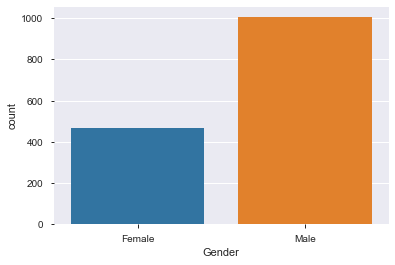

In [63]:
sns.countplot('Gender', data = employee)

- Male employees more than double of female employess

### Different types of skills possessed by employees in the organisation

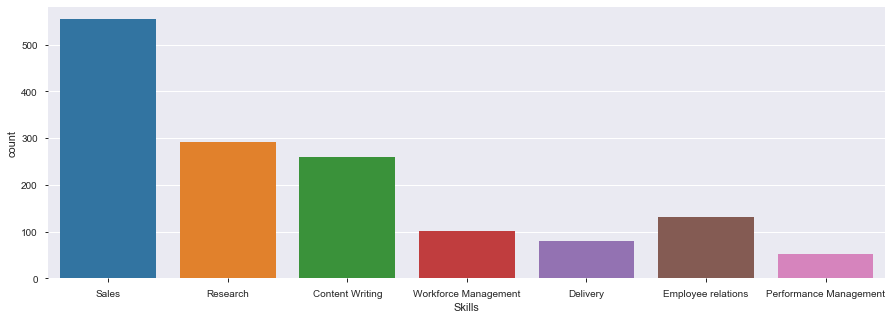

In [65]:
plt.figure(figsize = (15,5))
sns.countplot('Skills', data = employee)

- Sales department seems to have the maximum number of employees followed by Research and content writing departments

### How Work Life Balance, Overall Years of experience, experience in company and Performance Rating vary across the organisation?

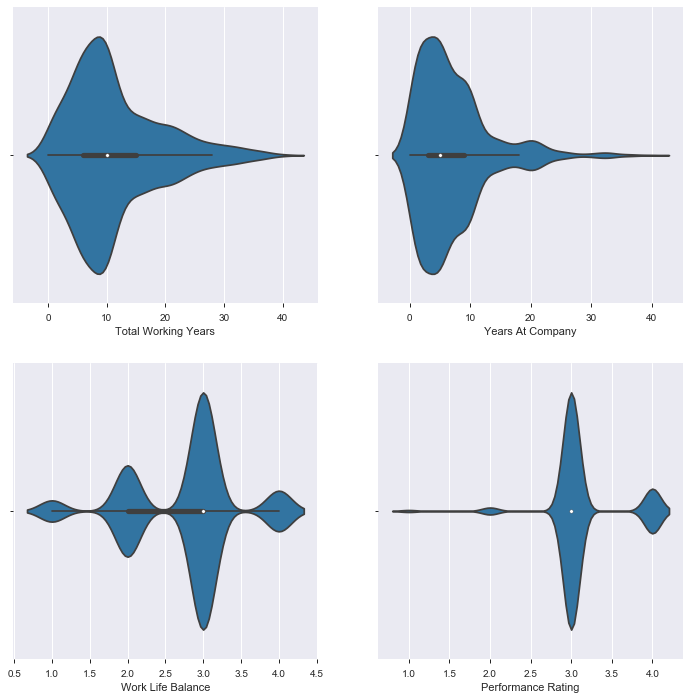

In [18]:
f,ax = plt.subplots(2,2, figsize = (12,12))
sns.violinplot('Total Working Years', data = employee, ax = ax[0,0])
sns.violinplot('Years At Company', data = employee, ax = ax[0,1])
sns.violinplot('Work Life Balance', data = employee, ax = ax[1,0])
sns.violinplot('Performance Rating', data = employee, ax = ax[1,1])

- Most employees have 5-12 years of experience. Very few have more than 30 years
- Most employees are working for maximum of 10 years at the company except for a few who have been there for more than 20 years to 40 years
- Most employees' work life balance falls under category 3 which can be interpreted as average
- Maximum employees get a performance rating of 3

## How does the monthly income distribution vary for 2017 and 2018?

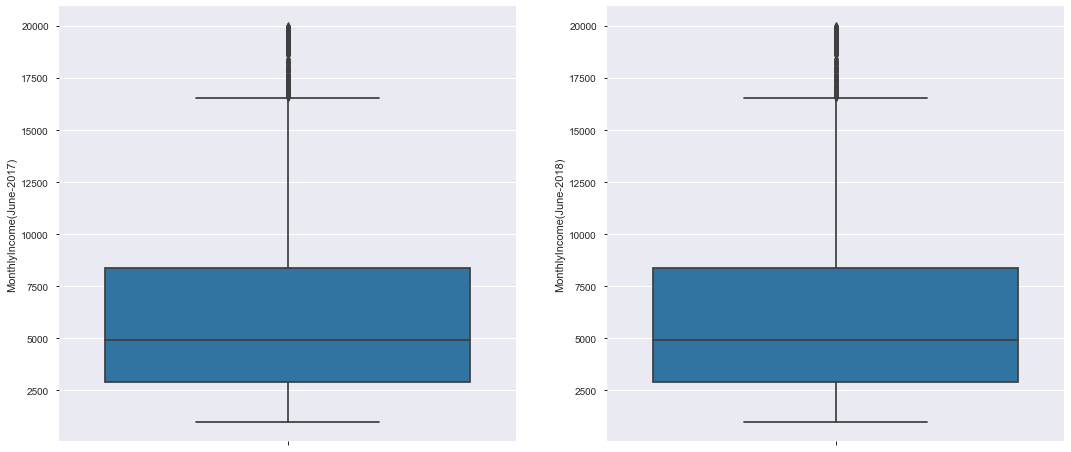

In [30]:
f,ax = plt.subplots(1,2, figsize = (18,8))
sns.boxplot(y = 'MonthlyIncome(June-2017)', data = employee,ax = ax[0])
sns.boxplot(y = 'MonthlyIncome(June-2018)', data = employee, ax = ax[1])


- There seems to be no difference in the monthly income across the 2 years. However, in summary statistics we had found that there was very small change in the first 25% observations and since it was very small the difference can not be spotted visually above

## Distribution of gender across Skills

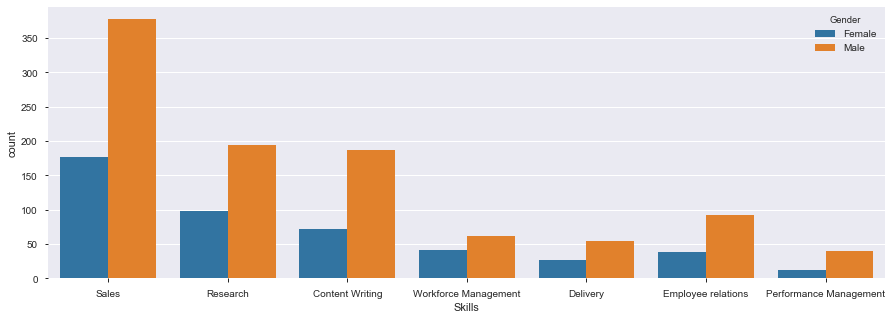

In [66]:
plt.figure(figsize = (15,5))
sns.countplot('Skills', data = employee, hue = 'Gender')

- In all departments, men are more. Sales being the biggest department, both men and women are more there
- In almost all departments it seems men are double in number than women. Only in workforce management department it seems that there is still a balance between the 2 genders

## Variation in monthly income across gender

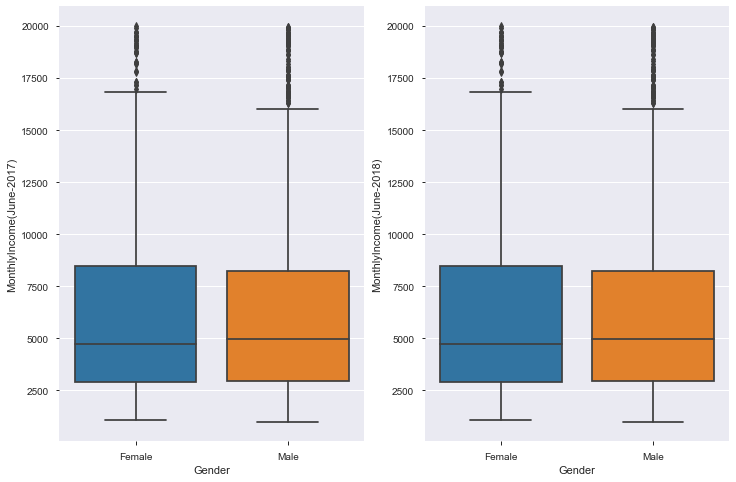

In [34]:
f,ax = plt.subplots(1, 2, figsize = (12,8))
sns.boxplot(x = 'Gender', y = 'MonthlyIncome(June-2017)', data = employee, ax = ax[0])
sns.boxplot(x = 'Gender', y = 'MonthlyIncome(June-2018)', data = employee, ax = ax[1])

- There does not seem to be any significant difference between monthly salaries of men and women in both 2017 and 2018 
- The variation for men seems to be little less than women though there are more extreme observations in case of men
- Ignoring outliers, female income is higher than male while including outliers it is the same

## Variation in monthly income (2018) across Skills

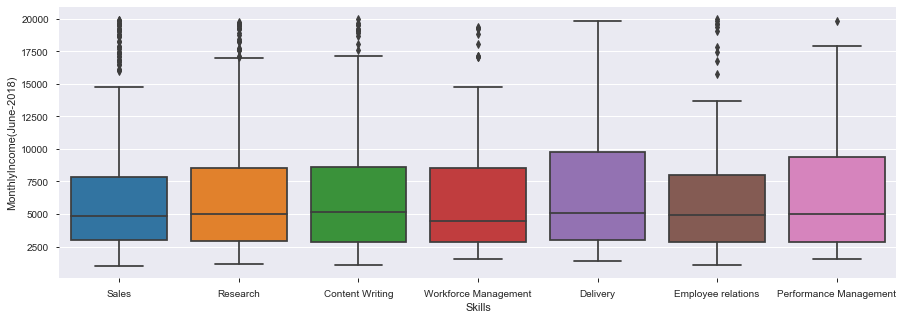

In [55]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Skills', y = 'MonthlyIncome(June-2018)', data = employee )

- Across all skills, the last 25% observations are quite spread out
- Salary for employess having skill set delivery is quite spread out. median' salary is higher than any other skill.It could be because many seniors are there
- In performance management only 1 employee gets much higher salary than others
- Max value (except outlier) for sales, workforce management and employee relations are lower than any other skill. Outliers could be because of experience

## Variation in monthly income (2018) across Skills for male and female

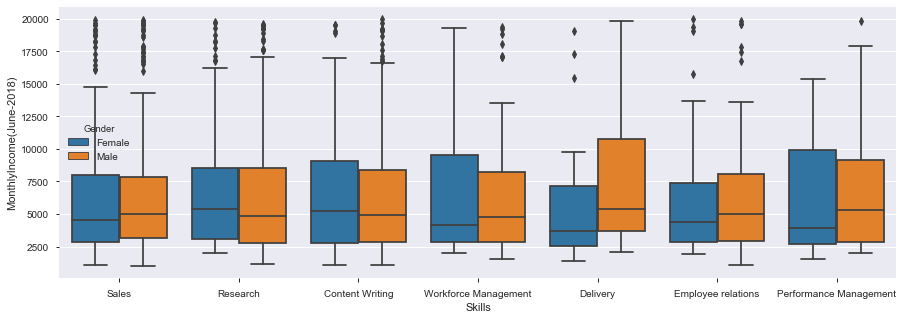

In [35]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Skills', y = 'MonthlyIncome(June-2018)', data = employee, hue = 'Gender' )

- Median salary for male are mostly higher than female across all skills except for research and content writing
- For skill delivery, women have quite low salaries compared to men. However, there are 3 outliers. Ignoring outliers, delivery generates the highest salary for few male employees
- Few male sales employees get the lowest salary
- No female employee in performance management gets more than 15000 salary
- Employee relations - min and max values are both high for female employees but median is higher for male. also spread is more for male
- under workforce management skills, women employees have a much larger variation in salary which goes upto 19000. for male employees max salary is somewhere around 14000 except for a few outliers

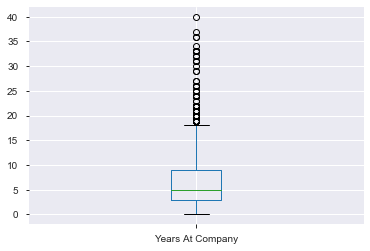

In [83]:
employee['Years At Company'].plot(kind = 'box')
#All values above 18 have been taken as outliers

In [ ]:
#company can take a look at these employess who have been with it for so long and may be acknowledge their efforts
#or look at their salaries and consider higher levels
#important - can find out how many in these outliers are women and how many are men. more years generally means high
#designations we can find how many women and men are there in those levels among total women and men respectively

In [86]:
senior_level = employee[employee['Years At Company'] > 18]
senior_level.groupby('Gender')['Years At Company'].count()

Gender
Female    31
Male      73
Name: Years At Company, dtype: int64

In [89]:
#This means 73 are male while 31 are women
print(31/465)
print(73/1005)
#roughly same percentage of total men and women are there in senior levels

0.06666666666666667
0.07263681592039802


## How work life balance varies across males and females

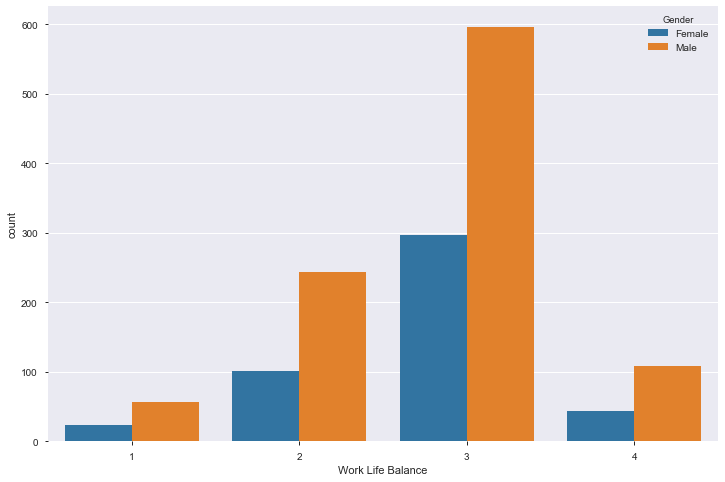

In [50]:
plt.figure(figsize = (12,8))
sns.countplot('Work Life Balance', data = employee, hue = 'Gender')

Mostly employees don't have a good kind of work life balanc. The count of both male and female is higher under work life balance 3.

## How Work Life Balance Varies across skills?

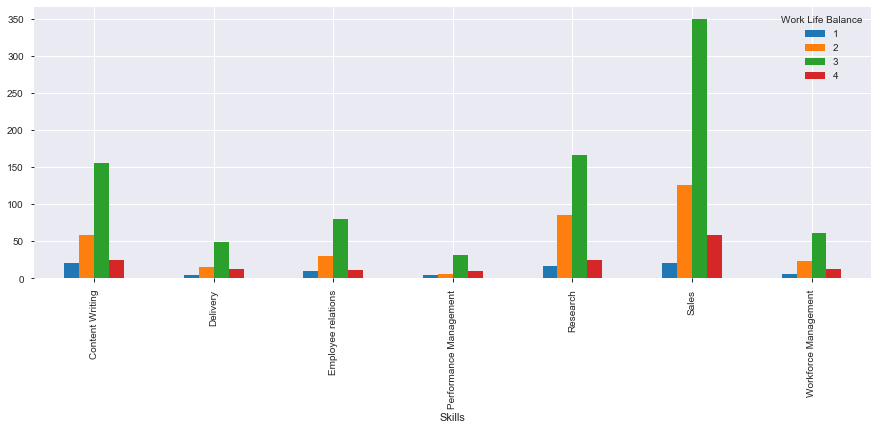

In [43]:
employee.groupby('Skills')['Work Life Balance'].value_counts().unstack().plot(kind = 'bar', figsize = (15,5))

There does not seem to be any significant pattern between skill set and work life balance.

## Relation between Work Life Balance and Performance Rating

In [49]:
tab1 = pd.crosstab(employee['Work Life Balance'], employee['Performance Rating'], margins = True)
tab1

Performance Rating,1,2,3,4,All
Work Life Balance,,,,,
1,0,0,66,14,80
2,3,9,284,48,344
3,7,23,722,141,893
4,0,3,127,23,153
All,10,35,1199,226,1470


- There are just no employees with Performance Rating = 1 and Work Life Balance also = 1
- Mostly employees have average work life balance and average performance rating (both equal to 3)
- May be company can focus on certain productivity and work life balance sessions to get more people under 1 and 2 categories of work life balance and performance rating

## How performance rating varies across males and females

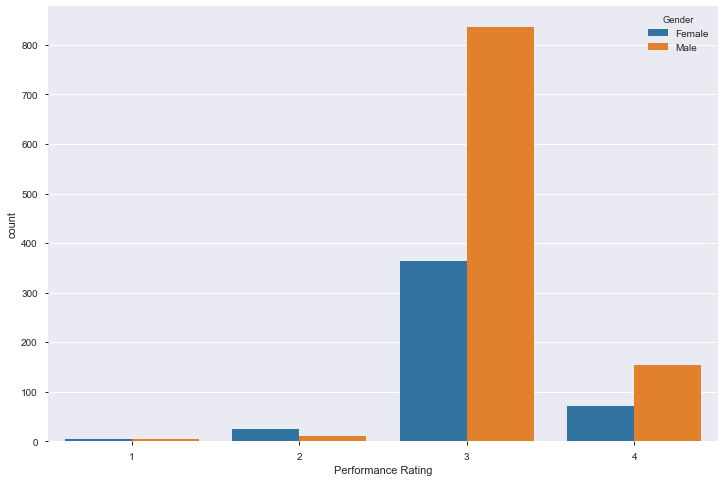

In [51]:
plt.figure(figsize = (12,8))
sns.countplot('Performance Rating', data = employee, hue = 'Gender')

- Most of the employees have performance rating of 3
- The number of female and male getting performance rating = 1 are same
- More women in performance rating = 2 category than men

## Does any particular skill help to achieve a high performance rating?

In [40]:
employee[employee['Performance Rating'].isin([1,2])].groupby(['Performance Rating', 'Gender'])['Skills'].value_counts()

Performance Rating  Gender  Skills                
1                   Female  Sales                     3
                            Content Writing           1
                            Delivery                  1
                    Male    Sales                     3
                            Content Writing           1
                            Research                  1
2                   Female  Sales                     9
                            Delivery                  4
                            Workforce Management      4
                            Content Writing           3
                            Research                  3
                            Employee relations        2
                    Male    Sales                     4
                            Research                  2
                            Content Writing           1
                            Employee relations        1
                            Performance Management   

More female employees in performance rating 2 than men due to the fact that delivery does not have any men with
good rating. Even in content writing, there are 4 women in 1-2 rating while only one man

## Is high performance rating related to number of years spent at the company?

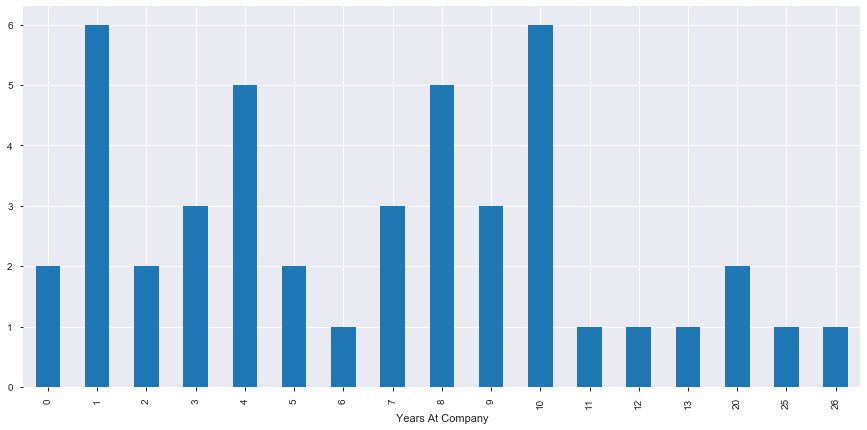

In [71]:
employee[employee['Performance Rating'].isin([1,2])].groupby('Years At Company').count()['Gender'].plot(kind = 'bar',
                                                                figsize = (15,7))

After 10 years, very few have good rating. So performance rating does not seems to be correlated with years spent at compnay. Good performance brings in good ratings

### Is the same valid across gender?

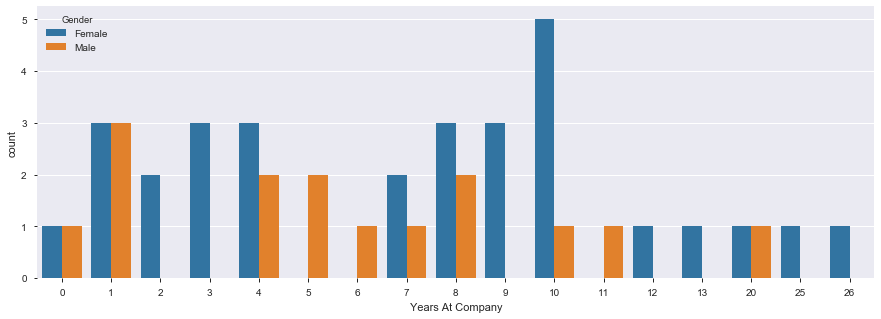

In [72]:
plt.figure(figsize = (15,5))
sns.countplot('Years At Company', data = employee[employee['Performance Rating'].isin([1,2])],
             hue = 'Gender')

Yes, same pattern can be seen across gender

### We had seen in summary statistics that there was a slight increase in salary for the first 25% employees. Let's check where exactly the difference has occurred

#### Let's compare monthly income between male and female 

In [75]:
employee.groupby('Gender').agg('mean')[['MonthlyIncome(June-2017)','MonthlyIncome(June-2018)']]

,MonthlyIncome(June-2017),MonthlyIncome(June-2018)
Gender,,
Female,6511.053763,6509.329032
Male,6499.971144,6499.971144


- There seems to be a slight decrease in female monthly income
- Monthly income for male is same across 2 years
- This could have happened had more female employees joined the company at certain positions or if experienced female employees have left the organisation

#### Let's find out the difference

In [80]:
newdf = employee.groupby(['Gender','Total Working Years']).mean()[['MonthlyIncome(June-2017)','MonthlyIncome(June-2018)']]
newdf.loc[newdf['MonthlyIncome(June-2017)'] != newdf['MonthlyIncome(June-2018)']]

MonthlyIncome(June-2017)  MonthlyIncome(June-2018)
Gender Total Working Years                                                    
Female 6                                 6687.878049               6664.170732
       8                                 5111.964286               5155.892857
       10                                6711.557377               6693.524590
       12                                8814.133333               8750.133333
       31                                6478.750000               6728.750000

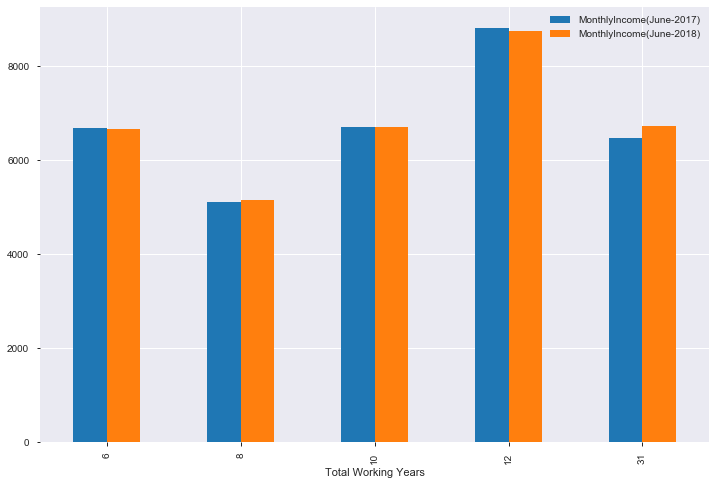

In [82]:
df_f = newdf.loc[newdf['MonthlyIncome(June-2017)'] != newdf['MonthlyIncome(June-2018)']]

df_f.groupby('Total Working Years')[['MonthlyIncome(June-2017)','MonthlyIncome(June-2018)']].sum().plot(kind = 'bar',
                                                            figsize = (12,8))

- For employees with 6, 10 and years of experience, may be someonw who earned more than others with same number of years of experience left the company and average came down
- For employees with 8 and above 30 years of experience also it could mean that someone with very high salary either ledt or joined the organisation that increased the average